In [1]:
import pandas as pd
import numpy as np

In [3]:
np.random.seed(1021)

In [ ]:
#싸이킷런 70:30

In [5]:
df=pd.read_csv("basketball_stat.csv")
df

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5
...,...,...,...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1


In [7]:
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

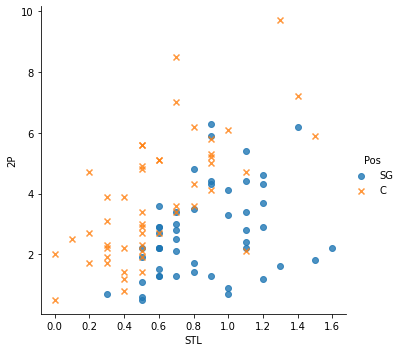

In [13]:
sns.lmplot('STL','2P', data=df, hue='Pos', markers=['o','x'], fit_reg=False)

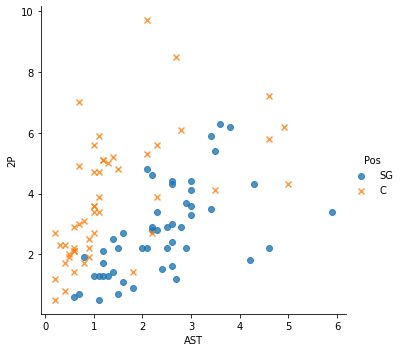

In [14]:
sns.lmplot('AST','2P', data=df, hue='Pos', markers=['o','x'], fit_reg=False)

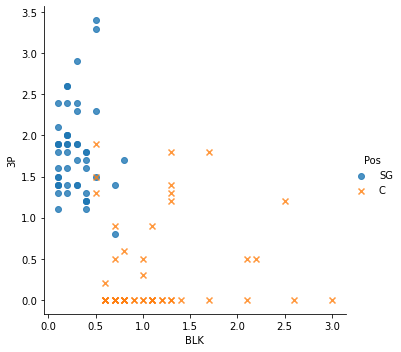

In [15]:
sns.lmplot('BLK','3P', data=df, hue='Pos', markers=['o','x'], fit_reg=False)

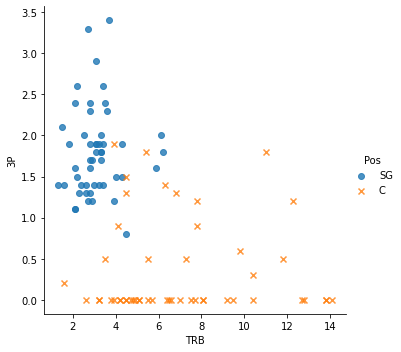

In [17]:
sns.lmplot('TRB','3P', data=df, hue='Pos', markers=['o','x'], fit_reg=False)

In [19]:
df.drop(['2P','AST','STL'],axis=1, inplace=True)

In [20]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [21]:
from sklearn.model_selection import train_test_split

In [23]:
train, test=train_test_split(df, test_size=0.2) #[트레이닝데이터프레임(80%), 테스트데이터프레임(20%)]

In [25]:
train.shape
test.shape

(20, 5)

In [26]:
train.to_csv("basketball_train.csv", index=None)
test.to_csv("basketball_test.csv", index=None)

In [31]:
#최적의 k값?
#k=3~학습데이터의 절반(maxKRange) 크기
maxKRange=train.shape[0]//2
kList=[]
for i in range(3, maxKRange, 2): #이진분류, 동점 고려
    kList.append(i)   

In [32]:
#교차검증(cross-validation)을 k가 3일때~ k가 39일때까지 반복하면서
#train : 80건 / 10 fold = 8건씩 * 10개 폴드 
#1번째 폴드(테스트), 2번째~10번째 폴드(트레이닝) -> 모델 => 정확도(80%)
#2번째 폴드(테스트), 1번째,3~10번째 폴드(트레이닝) -> 모델 => 정확도(85%)
#...
#10번째 폴드(테스트), 1번째~9번째 폴드(트레이닝) -> 모델 => 정확도(90%)
#전체 정확도의 평균 : 최종 성능(k=3, 5, 7, ..., 39)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [50]:
train.head()
xTrain=train[['3P','TRB','BLK']]
yTrain=train[['Pos']]

In [51]:
xTrain.shape
yTrain.shape
yTrain.values.ravel() #1차원으로 변경

array(['SG', 'SG', 'SG', 'SG', 'SG', 'SG', 'SG', 'C', 'C', 'C', 'SG',
       'SG', 'C', 'SG', 'C', 'C', 'SG', 'SG', 'SG', 'C', 'SG', 'SG', 'C',
       'C', 'C', 'C', 'SG', 'C', 'C', 'C', 'C', 'C', 'SG', 'C', 'C', 'SG',
       'C', 'SG', 'SG', 'C', 'C', 'C', 'C', 'C', 'C', 'SG', 'C', 'SG',
       'SG', 'SG', 'SG', 'C', 'SG', 'SG', 'SG', 'C', 'SG', 'SG', 'C',
       'SG', 'C', 'C', 'SG', 'C', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'SG',
       'SG', 'SG', 'SG', 'SG', 'C', 'C', 'C', 'C', 'SG'], dtype=object)

In [56]:
cross_val_scores=[]
for k in kList:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, xTrain, yTrain.values.ravel(), cv=10, scoring='accuracy')
    cross_val_scores.append(scores.mean())
cross_val_scores

[0.9125,
 0.9,
 0.9125,
 0.9125,
 0.9,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.875,
 0.8625,
 0.875,
 0.8375,
 0.85,
 0.8375,
 0.825,
 0.825,
 0.825,
 0.8125]

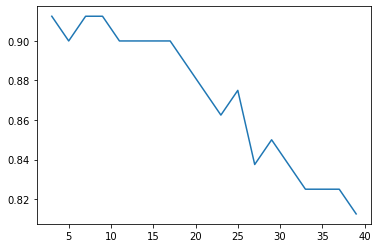

In [57]:
plt.plot(kList, cross_val_scores)

In [61]:
k=kList[cross_val_scores.index(max(cross_val_scores))]
print("최적의 k="+str(k)) #또는 7, 9일때 최적임

최적의 k=3


In [64]:
###3점슛과 블로킹 데이터로 포지션 예측하기###
#test
knn=KNeighborsClassifier(n_neighbors=k)

xTrain=train[['3P','BLK']]
yTrain=train['Pos']

knn.fit(xTrain, yTrain) #모델 생성

KNeighborsClassifier(n_neighbors=3)

In [66]:
test.head()

,Player,Pos,3P,TRB,BLK
37,Justin Hamilton,C,0.9,4.1,0.7
81,Marcus Smart,SG,1.2,3.9,0.4
65,C.J. McCollum,SG,2.3,3.6,0.5
28,Evan Fournier,SG,1.9,3.1,0.1
22,Troy Daniels,SG,2.1,1.5,0.1


In [69]:
pred=knn.predict(test[['3P', 'BLK']]) #포지션 예측

In [72]:
test['Pos']

37     C
81    SG
65    SG
28    SG
22    SG
77     C
51     C
45    SG
78    SG
24     C
44     C
9      C
90     C
82    SG
54     C
95     C
14    SG
18     C
48     C
73    SG
Name: Pos, dtype: object

In [74]:
test[['Pos']] #정답

#pd.DataFrame({"예측":pred, "정답":test[['Pos']].values.ravel()})
pd.DataFrame({"예측":pred, "정답":test['Pos']})

,예측,정답
37,SG,C
81,SG,SG
65,SG,SG
28,SG,SG
22,SG,SG
77,C,C
51,C,C
45,SG,SG
78,SG,SG
24,C,C


In [75]:
from sklearn.metrics import accuracy_score

In [80]:
print("정확도:"+str(accuracy_score(test['Pos'], pred)))

정확도:0.9


In [76]:
pred

array(['SG', 'SG', 'SG', 'SG', 'SG', 'C', 'C', 'SG', 'SG', 'C', 'C', 'C',
       'C', 'SG', 'SG', 'C', 'SG', 'C', 'C', 'SG'], dtype=object)

In [ ]:
#3점슛, 블로킹, 리바운드(3개 특징)->예측 => 코드&정확도 카페 제출